<a href="https://colab.research.google.com/github/dhivya4/Inceptz/blob/main/FetalHealth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/balaji2v/Inceptez_Batch19/main/fetal_health.csv")

In [ ]:
df.shape

(2126, 22)

In [ ]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [ ]:
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
for var in df.columns:
    
    print(df[var].value_counts())

133.0    136
130.0    111
122.0    109
138.0    103
125.0     91
128.0     85
120.0     78
142.0     77
144.0     77
132.0     76
136.0     72
140.0     70
134.0     67
135.0     65
146.0     62
127.0     60
137.0     59
129.0     57
131.0     56
143.0     56
123.0     56
148.0     52
121.0     44
139.0     39
141.0     39
126.0     38
145.0     37
115.0     28
150.0     26
110.0     21
149.0     18
119.0     17
152.0     17
112.0     16
147.0     14
151.0     14
159.0     12
114.0     11
158.0     10
124.0     10
118.0      9
154.0      8
106.0      7
116.0      5
157.0      4
156.0      4
117.0      2
160.0      1
Name: baseline value, dtype: int64
0.000    894
0.003    161
0.002    160
0.001    143
0.004    117
0.006    112
0.005    110
0.008    103
0.007     91
0.009     60
0.010     50
0.011     36
0.012     24
0.013     22
0.014     20
0.015      9
0.016      7
0.017      4
0.018      2
0.019      1
Name: accelerations, dtype: int64
0.000    1311
0.001     164
0.002     112
0.003

In [ ]:
df['fetal_health'].value_counts()

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

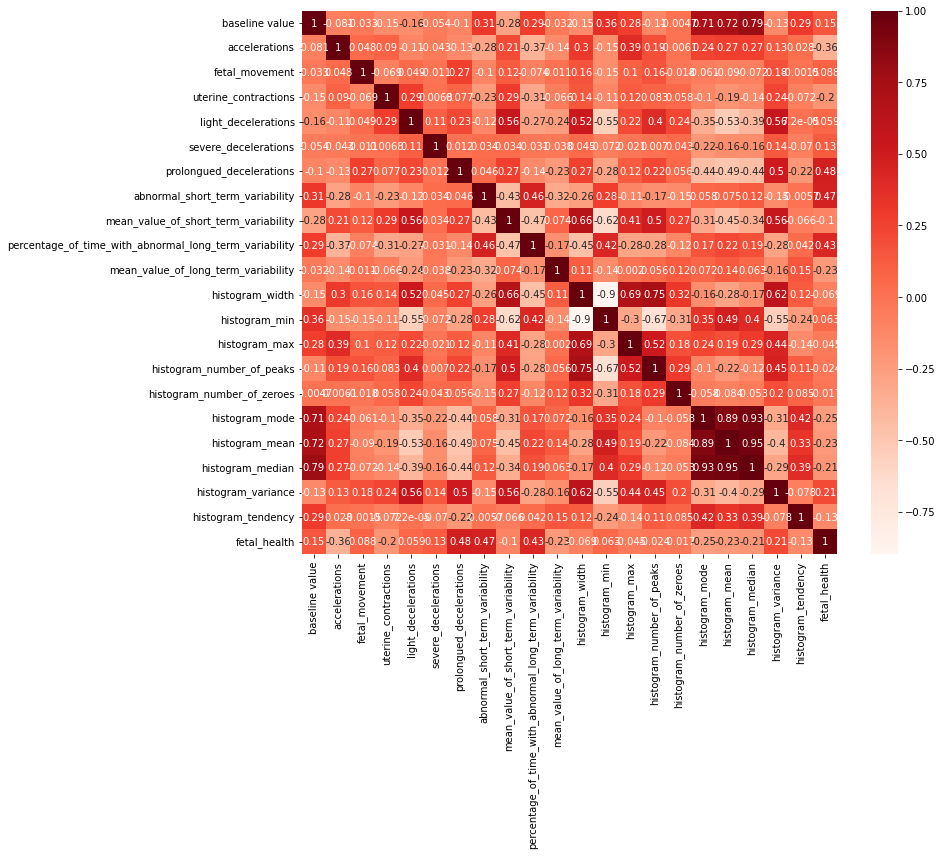

In [ ]:
#Using Pearson Correlation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [13]:
X = df.iloc[:,[0,1,2,3,4,5,6]]
Y = df[['fetal_health']]

In [14]:
X

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0
...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0


In [15]:
Y

,fetal_health
0,2.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
2121,2.0
2122,2.0
2123,2.0
2124,2.0


In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [17]:
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [18]:
X_train_scaler = sc.fit(X_train)
X_train_trans_scaler = sc.fit_transform(X_train)

In [19]:
X_train_trans_scaler

array([[-0.75497324,  0.73177049, -0.20409454, ..., -0.65113481,
        -0.05191741, -0.27743789],
       [ 1.74054735, -0.82228444, -0.20409454, ..., -0.31622689,
        -0.05191741, -0.27743789],
       [ 1.32462725, -0.82228444, -0.20409454, ..., -0.65113481,
        -0.05191741, -0.27743789],
       ...,
       [-1.06691332,  3.5808712 , -0.20409454, ..., -0.65113481,
        -0.05191741, -0.27743789],
       [-1.27487336, -0.04525698, -0.07205425, ..., -0.65113481,
        -0.05191741, -0.27743789],
       [-0.65099322,  0.21375218, -0.20409454, ..., -0.65113481,
        -0.05191741, -0.27743789]])

In [20]:
X_train_trans_scaler.size

10416

In [21]:
X_test_trans_scaler = sc.transform(X_test)

X_test_trans_scaler.size

4466

In [22]:
gnb = GaussianNB()
knn = KNeighborsClassifier()

In [23]:
#fitting models and checking for classification metrics
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
for i in [gnb,knn]:
  i.fit(X_train,Y_train)
  pred = i.predict(X_test)
  test_score = accuracy_score(Y_test,pred)
  train_score = accuracy_score(Y_train,i.predict(X_train))
  print(i)
  print('Accuracy score for train data', accuracy_score(Y_test,pred))
  print('Accuracy score for test data', accuracy_score(Y_train,i.predict(X_train)))
  print(classification_report(Y_test,pred))
  print(confusion_matrix(Y_test,pred))

GaussianNB()
Accuracy score for train data 0.8119122257053292
Accuracy score for test data 0.8239247311827957
              precision    recall  f1-score   support

         1.0       0.95      0.85      0.90       490
         2.0       0.47      0.77      0.59        96
         3.0       0.65      0.54      0.59        52

    accuracy                           0.81       638
   macro avg       0.69      0.72      0.69       638
weighted avg       0.85      0.81      0.82       638

[[416  62  12]
 [ 19  74   3]
 [  4  20  28]]
KNeighborsClassifier()
Accuracy score for train data 0.8087774294670846
Accuracy score for test data 0.9012096774193549
              precision    recall  f1-score   support

         1.0       0.88      0.92      0.90       490
         2.0       0.51      0.45      0.48        96
         3.0       0.59      0.46      0.52        52

    accuracy                           0.81       638
   macro avg       0.66      0.61      0.63       638
weighted avg     

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
